# 波段差值

In [15]:
import os 
from osgeo import gdal
os.chdir(r'D:\Projects\VsCode\Python\img_processing_system\change_detection\imgs\difference')
t_1 = gdal.Open('2015_t1_clip.tif') # t_1和t_2的分辨率大小有一点点不一样
t_2 = gdal.Open('2018_t2_clip_register.tif')

t_1_band = t_1.GetRasterBand(1)
t_2_band = t_2.GetRasterBand(1)


gtiff_driver = gdal.GetDriverByName('GTiff') 
out_ds = gtiff_driver.Create('difference_between_t1_t2.tif', t_2_band.XSize, t_2_band.YSize)
out_ds.SetProjection(t_1.GetProjection()) 
out_ds.SetGeoTransform(t_1.GetGeoTransform())

t_1_data = t_1_band.ReadAsArray(buf_xsize=t_2_band.XSize, buf_ysize=t_2_band.YSize)
t_2_data = t_2_band.ReadAsArray(buf_xsize=t_2_band.XSize, buf_ysize=t_2_band.YSize)

out_band = out_ds.GetRasterBand(1) 
out_band.WriteArray(t_2_data - t_1_data)

out_band.FlushCache() 
out_band.ComputeStatistics(False) 
out_ds.BuildOverviews('average', [2, 4, 8, 16, 32, 64])
del out_ds

In [ ]:
# t_2_data - t_1_data的结果是uint8，即不存在负数。
import numpy as np
res = t_2_data.astype(np.int16) - t_1_data.astype(np.int16)
threshold = 80 # TODO 如何确定阈值？
change_mask = np.abs(res) >= threshold


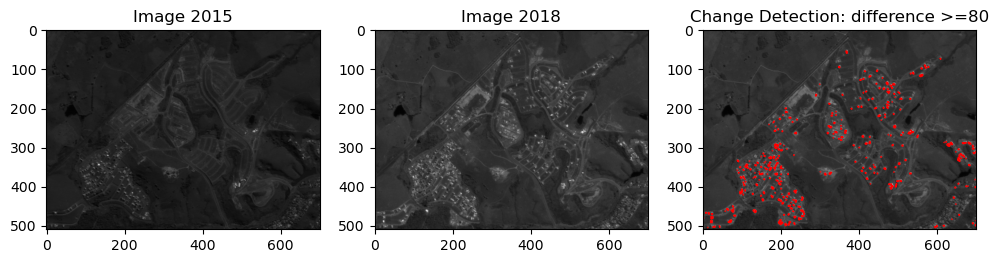

In [19]:
import matplotlib.pyplot as plt

# 创建一个新的图像
plt.figure(figsize=(12, 6))

# 绘制第一幅图像
plt.subplot(1, 3, 1)
plt.imshow(t_1_data, cmap='gray')
plt.title("Image 2015")

# 绘制第二幅图像
plt.subplot(1, 3, 2)
plt.imshow(t_2_data, cmap='gray')
plt.title("Image 2018")

# 绘制第二幅图像
plt.subplot(1, 3, 3)
plt.imshow(t_2_data, cmap='gray')

# 绘制变化区域
plt.contour(change_mask, colors='r', linewidths=1)
plt.title("Change Detection: difference >=" + str(threshold))

# 显示图像
plt.show()

# 光谱指数差值
以NDVI为例，影像数据来源：https://neo.gsfc.nasa.gov/view.php?datasetId=MOD_NDVI_M&utm_source=chatgpt.com&year=2010

In [ ]:
import os 
import numpy as np
from osgeo import gdal
os.chdir(r'D:\Projects\VsCode\Python\img_processing_system\change_detection\imgs\difference')
ndvi_2025_ds= gdal.Open('NDVI_M_2025-05-01_gs_3600x1800.TIFF') 
ndvi_2010_ds= gdal.Open('NDVI_M_2010-05-01_gs_3600x1800.TIFF') 

ndvi_2025_band = ndvi_2025_ds.GetRasterBand(1)
ndvi_2010_band = ndvi_2010_ds.GetRasterBand(1)

ndvi_2025_band_data = ndvi_2025_band.ReadAsArray()
ndvi_2010_band_data = ndvi_2010_band.ReadAsArray()

gtiff_driver = gdal.GetDriverByName('GTiff') 
out_ds = gtiff_driver.Create('ndvi_difference_between_2025_2010.tif', ndvi_2025_band.XSize, ndvi_2025_band.YSize)
out_ds.SetProjection(ndvi_2025_ds.GetProjection()) 
out_ds.SetGeoTransform(ndvi_2025_ds.GetGeoTransform())

out_band = out_ds.GetRasterBand(1) 
out_band.WriteArray(ndvi_2025_band_data - ndvi_2010_band_data)

out_band.FlushCache() 
out_band.ComputeStatistics(False) 
out_ds.BuildOverviews('average', [2, 4, 8, 16, 32, 64])
del out_ds
